
 The First Five Rows 

     College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
4067    CLG0001  104             9.58  9.73                     5   
1000    CLG0001  120             9.48  8.99                     3   
6083    CLG0001  102             7.77  7.57                     2   
6213    CLG0001   80             7.04  7.26                     6   
93      CLG0001   95             8.10  8.52                     4   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
4067                   Yes                      10                     5   
1000                   Yes                      10                    10   
6083                    No                       5                     5   
6213                    No                      10                     7   
93                     Yes                       4                    10   

      Projects_Completed Placement  
4067                   3        No  
1000                   2      

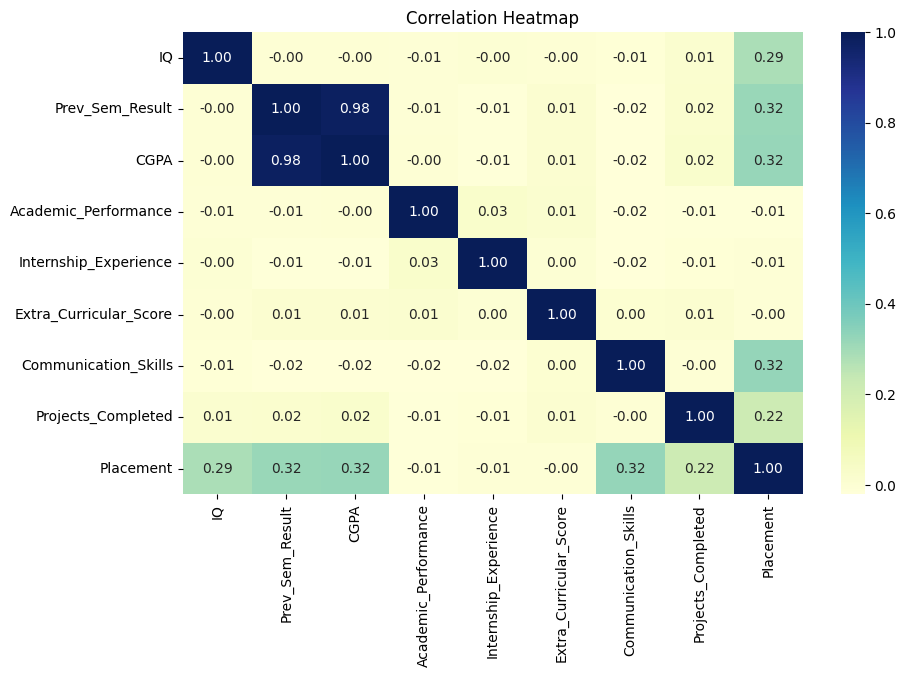

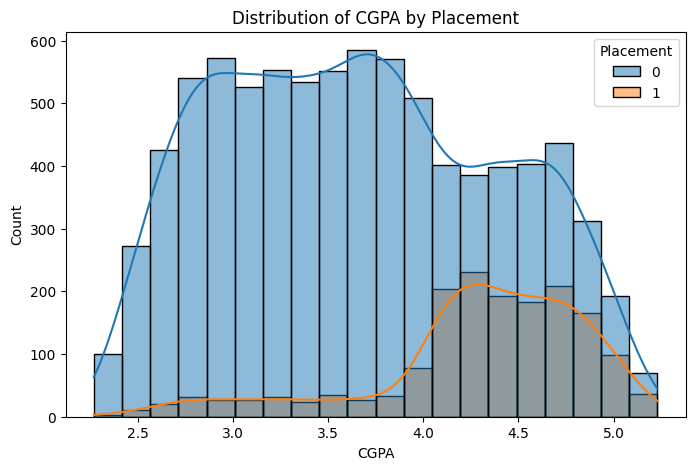

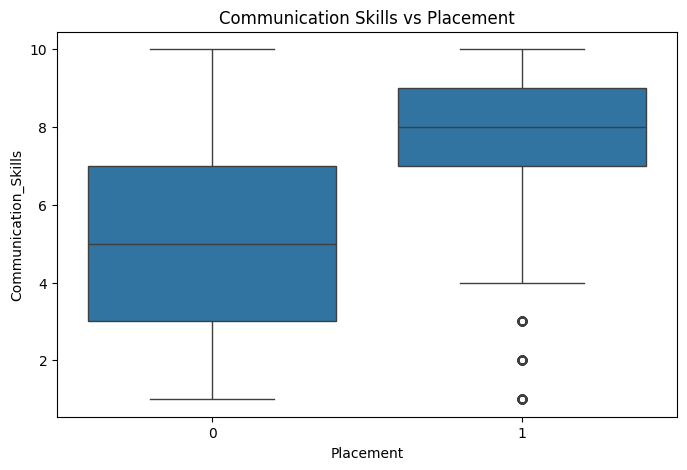

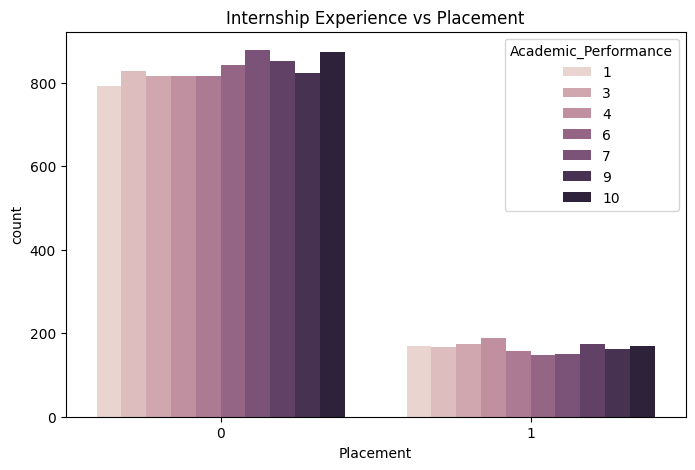

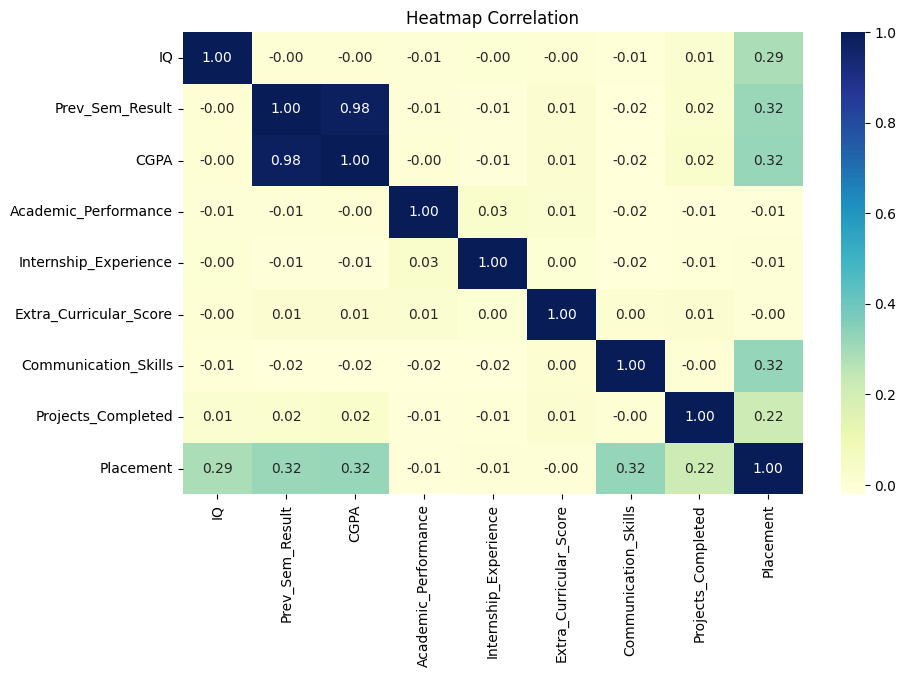

In [ ]:
#Importing the Libraries
#Pandas used for data handling & analysis (tables, cleaning)
import pandas as pd 
#NumPy is used for fast numerical computations (arrays, math)
import numpy as np  
#Matplotlib (plt) is the base plotting library (line, bar, scatter, etc.)
import matplotlib.pyplot as plt 
#Seaborn (sns) provides more advanced & prettier visualizations (built on Matplotlib)
import seaborn as sns   


#Importing the Dataset from Libre Office
df = pd.read_csv("/home/user/Pyth/pyth_mysql/pandas/CollegePlacement/CollegePlacement.csv")

#Arranging the ID column in a ascending order
df = df.sort_values(by="College_ID")  #Sorts the DataFrame by the "ID" column in ascending order

#Display the first 5 rows
print("\n The First Five Rows \n")
print(df.head())

#Shows information about the dataset (like the number of rows, columns, data types)
print("\n Information on the Dataset \n")
print(df.info())

#Descriptive Statistics
print("\n Numerical Summary \n")   #Prints out the heading "Numerical Statistics" 
#Each column gets described statistically and each column in the dataset gets its own row (Transpose)
print(df.describe().T)  

#Check dataset shape (rows, columns)
print("\n Shape of the Dataset \n")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

#Checking for missing values
print("\n Check for Missing Values \n")
print(df.isnull().sum())  #Shows the sum of missing values in each column

#Counting the values of Yes/No in the "Placement" and "Internship_Experience" columns
print("\n The Value Counts for Internship_Experience \n")
print(df["Internship_Experience"].value_counts())  #Counts the occurrences of each unique value in the "Internship_Experience" column

print("\n The Value Counts for Placement \n")
print(df["Placement"].value_counts())  #Counts the occurrences of each unique value in the "Placement" column

#Changing the Values in the "Placement" and "Internship_Experience" columns from Yes/No to 1/0
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes":1, "No":0})
print(df.head())

df["Placement"] = df["Placement"].map({"Yes":1,"No":0})
print(df.head())

#Converting the CGPA column fronm 10-point scale to 5-point scale
df["CGPA"] = df["CGPA"] / 2
print(df.head())


#Correlation Analysis
print("\n The Average Values Grouped by Placement \n")
print(df.groupby("Placement").mean(numeric_only=True).T)

#Convert the Pandas DataFrame into NumPy array
#Getting the CGPA Statsistics using NumPy
cgpa_array = df["CGPA"].to_numpy()   #Changing the "CGPA" column and converting it to a NumPy array
print("\n CGPA Statistics (NumPy) \n")   #Prints out the heading "CGPA Statistics (NumPy)"

print("Mean:", np.mean(cgpa_array))   #Prints the mean of the CGPA values
print("Median:", np.median(cgpa_array))   #Prints the median of the CGPA values
print("Standard Deviation:", np.std(cgpa_array))   #Prints the standard deviation of the CGPA values

#Geting the IQ Statsistics using NumPy
iq_array = df["IQ"].to_numpy()   #Changing the "IQ" column and converting it to a NumPy array
print("\n IQ Range (NumPy) \n")   #Prints out the heading "IQ Statistics (NumPy)"

print("Max IQ:", np.max(iq_array))
print("Min:", np.min(iq_array))
print("Average:", np.average(iq_array))


##Visualizations##
correlation_matrix = df.corr(numeric_only=True)   #To create correlation matrix from numeric columns

#Heatmap of correlations
plt.figure(figsize=(10,6)) #Creates and adjusts the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f") #correlation_matrix =DataFrame of correlations,
                                                                        #annot=True =Write the correlation values inside each cell,  cmap="coolwarm" =Use the "coolwarm" color palette (blue = negative, red = positive),
                                                                        # fmt=".2f" =Format the numbers to 2 decimal places
plt.title("Correlation Heatmap")   #States the title of the heatmap
plt.show()

#Histogram of CGPA by Placement
plt.figure(figsize=(8,5))   #Size of the figure
sns.histplot(data=df, x="CGPA", hue="Placement", kde=True, bins=20)     #dDraws a histogram, data=dataset we're using, x=x-axis (CGPA) then the y-axis is number of students, 
                                                                        #hue=color-code by another column (categorical: Placement = Placed / Not Placed),
                                                                        # kde=smooth density curve over the histogram,  bins=Number of bars (bins) to divide the CGPA range into
plt.title("Distribution of CGPA by Placement")   #States the title of the histogram
plt.show()

#Boxplot of Communication_Skills by Placement
plt.figure(figsize=(8,5))   #Size of the figure
sns.boxplot(x="Placement", y="Communication_Skills", data=df)   #Draws a boxplot, x=Placement(0 or 1), y=Communication_Skills using dataset df
plt.title("Communication Skills vs Placement")  #States the title of the boxplot
plt.show()

#Counterplot of Internship_Experience vs Placement
plt.figure(figsize=(8,5))   #Size of the figure
sns.countplot(hue="Academic_Performance", x="Placement", data=df)   #Draws a countplot, hue=Internship_Experience(0 or 1), x=Placement(0 or 1) using dataset df
plt.title("Internship Experience vs Placement")
plt.show()

